In [18]:
import xarray as xr

from shnitsel.dynamic import (
    xrhelpers as xh,
    postprocess as P,
    datasheet,
)
from shnitsel.dynamic.plot import dihedral_kde

In [6]:
import os
os.chdir('/git/shnitsel-data/')

To keep file-size low, the larger datasets have been split into groups of trajectories. They can be reassembled using `xarray.concat()`.

In [8]:
parts = [xh.open_frames(f'dynamic/propene_{i}.nc') for i in [0,1,2]]
frames = xr.concat(parts, dim='frame')
frames

<xarray.Dataset> Size: 667MB
Dimensions:    (state: 3, frame: 98923, direction: 3, statecomb: 3, atom: 9,
                trajid_: 250, state2: 3)
Coordinates:
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 72B 0 1 2 3 4 5 6 7 8
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 1kB 3 6 8 9 11 13 14 ... 573 574 578 579 580 583
  * statecomb  (statecomb) object 24B MultiIndex
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
  * frame      (frame) object 791kB MultiIndex
  * trajid     (frame) int64 791kB 3 3 3 3 3 3 3 ... 583 583 583 583 583 583 583
  * time       (frame) float64 791kB 0.0 0.5 1.0 1.5 ... 198.5 199.0 199.5 200.0
    atNames    (atom) <U1 36B 'C' 'C' 'H' 'H' 'C' 'H' 'H' 'H' 'H'
Data variables:
    energy     (state, frame) float64 2MB 3.768 3.741 3.692 ... 14.84 14.86
    dip_perm   (state, direction, frame) float64 7MB -0.5668 -0.5639 ... 1.529
    dip_trans  (statecomb, direction, frame) float64 7MB -1.404 ... 0.7842
    sdiag      (frame) int64 791kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1
    astate     (frame) int64 791kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1
    forces     (state, atom, direction, frame) float64 64MB -0.05792 0.0 ... 0.0
    phases     (state, frame) float64 2MB -1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nacs       (statecomb, atom, direction, frame) float64 64MB 0.0001381 ......
    atXYZ      (atom, direction, frame) float64 21MB -0.01442 ... -0.4445
    max_ts     (frame, trajid_) float64 198MB 400.0 400.0 400.0 ... 400.0 400.0
    completed  (frame, trajid_) float32 99MB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nsteps     (frame, trajid_) float64 198MB 401.0 401.0 401.0 ... 401.0 401.0
Attributes:
    delta_t:  0.5

A single variable can be selected

In [9]:
frames.energy

<xarray.DataArray 'energy' (state: 3, frame: 98923)> Size: 2MB
array([[ 3.76842869,  3.74074655,  3.69232388, ...,  7.96849799,
         8.21075552,  8.36191749],
       [ 9.90647115,  9.83186297,  9.70864165, ..., 11.64483519,
        11.82129286, 11.95615794],
       [16.19278574, 16.16636348, 16.13387853, ..., 14.80833843,
        14.83905737, 14.85532978]])
Coordinates:
  * state    (state) int64 24B 1 2 3
  * frame    (frame) object 791kB MultiIndex
  * trajid   (frame) int64 791kB 3 3 3 3 3 3 3 3 ... 583 583 583 583 583 583 583
  * time     (frame) float64 791kB 0.0 0.5 1.0 1.5 ... 198.5 199.0 199.5 200.0
Attributes:
    units:    eV
    unitdim:  Energy

A particular trajectory can be selected

In [11]:
frames.sel(trajid=151)

<xarray.Dataset> Size: 3MB
Dimensions:    (state: 3, time: 401, direction: 3, statecomb: 3, atom: 9,
                trajid_: 250, state2: 3)
Coordinates:
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 72B 0 1 2 3 4 5 6 7 8
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 1kB 3 6 8 9 11 13 14 ... 573 574 578 579 580 583
  * statecomb  (statecomb) object 24B MultiIndex
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
  * time       (time) float64 3kB 0.0 0.5 1.0 1.5 ... 198.5 199.0 199.5 200.0
    atNames    (atom) <U1 36B 'C' 'C' 'H' 'H' 'C' 'H' 'H' 'H' 'H'
    trajid     int64 8B 151
Data variables:
    energy     (state, time) float64 10kB 1.977 1.922 1.866 ... 14.2 14.88 14.88
    dip_perm   (state, direction, time) float64 29kB -0.175 -0.1645 ... -0.7085
    dip_trans  (statecomb, direction, time) float64 29kB -1.238 ... -0.5689
    sdiag      (time) int64 3kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1
    astate     (time) int64 3kB 2 2 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1 1 1 1
    forces     (state, atom, direction, time) float64 260kB -0.008158 ... 0.0
    phases     (state, time) float64 10kB -1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nacs       (statecomb, atom, direction, time) float64 260kB -0.165 ... -0.0
    atXYZ      (atom, direction, time) float64 87kB 0.02861 0.02 ... 0.3373
    max_ts     (time, trajid_) float64 802kB 400.0 400.0 400.0 ... nan nan nan
    completed  (time, trajid_) float32 401kB 1.0 1.0 1.0 1.0 ... nan nan nan nan
    nsteps     (time, trajid_) float64 802kB 401.0 401.0 401.0 ... nan nan nan
Attributes:
    delta_t:  0.5

...or a cross-section of all trajectories at a particular time

In [12]:
frames.sel(time=15.5)

<xarray.Dataset> Size: 2MB
Dimensions:    (state: 3, trajid: 250, direction: 3, statecomb: 3, atom: 9,
                trajid_: 250, state2: 3)
Coordinates:
  * state      (state) int64 24B 1 2 3
  * state2     (state2) int64 24B 1 2 3
  * atom       (atom) int64 72B 0 1 2 3 4 5 6 7 8
  * direction  (direction) <U1 12B 'x' 'y' 'z'
  * trajid_    (trajid_) int32 1kB 3 6 8 9 11 13 14 ... 573 574 578 579 580 583
  * statecomb  (statecomb) object 24B MultiIndex
  * from       (statecomb) int64 24B 1 1 2
  * to         (statecomb) int64 24B 2 3 3
  * trajid     (trajid) int64 2kB 3 6 8 9 11 13 14 ... 573 574 578 579 580 583
    atNames    (atom) <U1 36B 'C' 'C' 'H' 'H' 'C' 'H' 'H' 'H' 'H'
    time       float64 8B 15.5
Data variables:
    energy     (state, trajid) float64 6kB 7.161 8.308 5.883 ... 15.79 13.11
    dip_perm   (state, direction, trajid) float64 18kB -0.8937 ... -0.03392
    dip_trans  (statecomb, direction, trajid) float64 18kB -1.309 ... -0.1907
    sdiag      (trajid) int64 2kB 1 2 2 2 1 2 1 2 2 1 2 ... 2 2 2 2 2 2 1 2 1 2
    astate     (trajid) int64 2kB 1 2 2 2 1 2 1 2 2 1 2 ... 2 2 2 2 2 2 1 2 1 2
    forces     (state, atom, direction, trajid) float64 162kB -0.1463 ... 0.0
    phases     (state, trajid) float64 6kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    nacs       (statecomb, atom, direction, trajid) float64 162kB -0.0 ... -0.0
    atXYZ      (atom, direction, trajid) float64 54kB -0.1274 ... 0.7164
    max_ts     (trajid, trajid_) float64 500kB 400.0 400.0 400.0 ... 400.0 400.0
    completed  (trajid, trajid_) float32 250kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    nsteps     (trajid, trajid_) float64 500kB 401.0 401.0 401.0 ... 401.0 401.0
Attributes:
    delta_t:  0.5

Most operations can be vectorized, but [explain rationale for multiindex]  
So groupby can be used to perform operations on a per-trajectory basis.  
For example, to calculate the ratio of timesteps spent in $S_1$ vs in $S_0$:

In [14]:
import numpy as np
frames['astate'].groupby('trajid').map(lambda x: np.sum(x==2) / np.sum(x==1))

<xarray.DataArray 'astate' (trajid: 250)> Size: 2kB
array([6.93333333e-02, 1.31791908e+00, 6.63900415e-01, 8.67208672e-02,
       5.52631579e-02, 4.11971831e-01, 5.24934383e-02, 1.99253731e+00,
       3.41137124e-01, 6.08465608e-02, 1.86390533e-01, 5.80474934e-02,
       2.97734628e-01, 8.67208672e-02, 2.33846154e-01, 1.86390533e-01,
       3.59322034e-01, 3.59322034e-01, 3.68421053e-01, 7.21925134e-02,
       5.24934383e-02, 8.96739130e-02, 5.36398467e-01, 8.67208672e-02,
       1.24022346e+00, 5.80474934e-02, 1.32768362e-01, 1.82890855e-01,
       1.55619597e-01, 2.04204204e-01, 2.49221184e-01, 4.47653430e-01,
       1.62318841e-01, 2.04204204e-01, 8.67208672e-02, 4.42708333e-02,
       4.85185185e-01, 6.93333333e-02, 2.18844985e-01, 5.80474934e-02,
       5.80474934e-02, 5.80474934e-02, 9.27884615e-01, 5.54263566e-01,
       6.36604775e-02, 8.33333333e-01, 1.45714286e-01, 4.68864469e-01,
       9.86301370e-02, 4.74264706e-01, 4.69973890e-02, 1.07734807e-01,
       2.93548387e-01, 8.37837838e-02, 5.52631579e-02, 2.81150160e-01,
       2.57053292e-01, 3.54729730e-01, 2.93548387e-01, 4.16961131e-01,
       8.67208672e-02, 4.69973890e-02, 8.91509434e-01, 3.63945578e-01,
       5.52631579e-02, 1.58959538e-01, 2.89389068e-01, 4.47653430e-01,
       3.88601036e-02, 3.88601036e-02, 1.42450142e-01, 2.22560976e-01,
       5.24714829e-01, 6.93333333e-02, 1.80952381e+01, 6.64893617e-02,
       5.30534351e-01, 2.07831325e-01, 4.87804878e-01, 4.97382199e-02,
...
       2.45341615e-01, 1.82890855e-01, 1.58959538e-01, 5.26315789e-02,
       2.15151515e-01, 1.33139535e+00, 2.64984227e-01, 2.07831325e-01,
       2.33846154e-01, 2.53125000e-01, 8.37837838e-02, 1.13888889e-01,
       5.07518797e-01, 4.52898551e-01, 6.08465608e-02, 9.95024876e-01,
       3.73287671e-01, 3.59322034e-01, 5.36398467e-01, 1.23249300e-01,
       8.37837838e-02, 6.64893617e-02, 1.86390533e-01, 3.59322034e-01,
       9.56284153e-02, 8.08625337e-02, 8.96739130e-02, 5.24934383e-02,
       2.57053292e-01, 5.36507937e+00, 8.37837838e-02, 6.77824268e-01,
       2.26299694e-01, 4.42708333e-02, 7.66519824e-01, 5.52631579e-02,
       5.60311284e-01, 4.15584416e-02, 1.07734807e-01, 3.59322034e-01,
       2.07831325e-01, 5.07518797e-01, 2.93548387e-01, 2.68987342e-01,
       6.43442623e-01, 4.42708333e-02, 7.21925134e-02, 6.36604775e-02,
       1.07734807e-01, 1.72514620e-01, 2.77070064e-01, 1.13888889e-01,
       4.35555556e+01, 7.21925134e-02, 7.79569892e-02, 1.13888889e-01,
       1.48997135e-01, 5.52631579e-02, 7.21925134e-02, 8.45070423e-02,
       3.32225914e-01, 3.35051546e-02, 6.10441767e-01, 8.73831776e-01,
       8.08625337e-02, 1.55619597e-01, 1.07734807e-01, 1.94852941e+00,
       2.49221184e-01, 1.08854167e+00, 2.18844985e-01, 4.74264706e-01,
       9.26430518e-02, 7.51091703e-01, 4.15584416e-02, 3.54729730e-01,
       1.84397163e+00, 3.06188925e-01])
Coordinates:
  * trajid   (trajid) int64 2kB 3 6 8 9 11 13 14 ... 571 573 574 578 579 580 583

To reproduce the datasheet in the supplementary information:

[02:24:09] WARNING: not removing hydrogen atom without neighbors
[02:24:09] WARNING: Proton(s) added/removed



[H+].[H]/[C-]=C/C InChI=1S/C3H5/c1-3-2/h1,3H,2H3/q-1/p+1


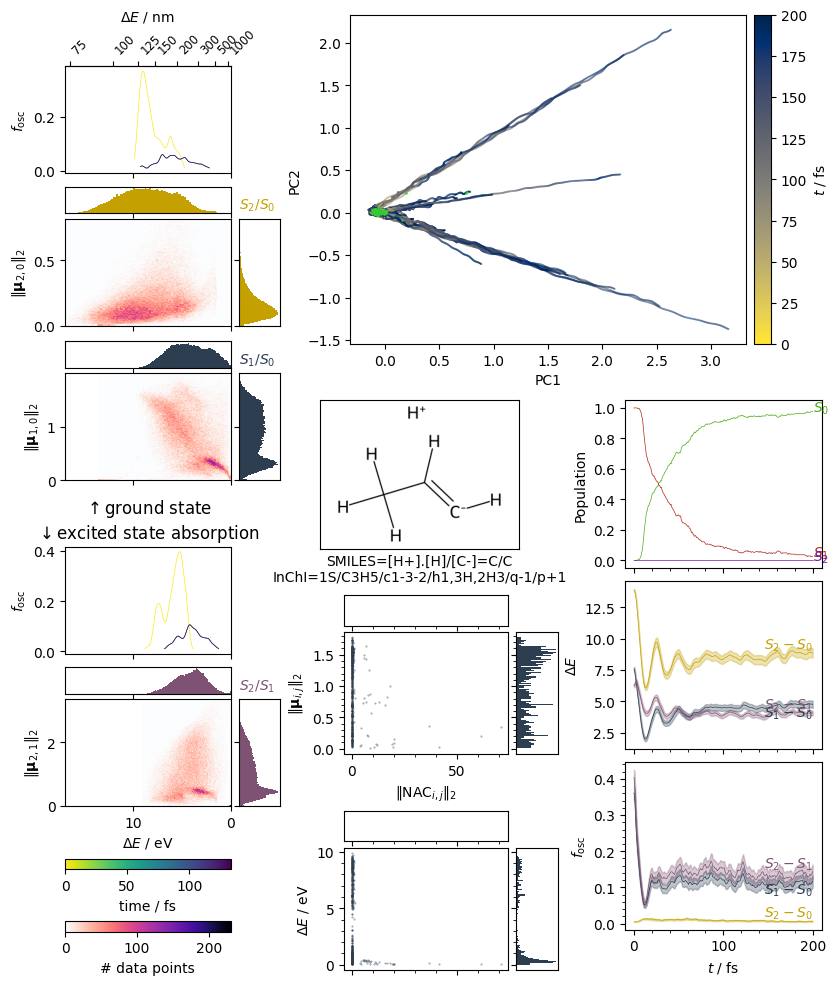

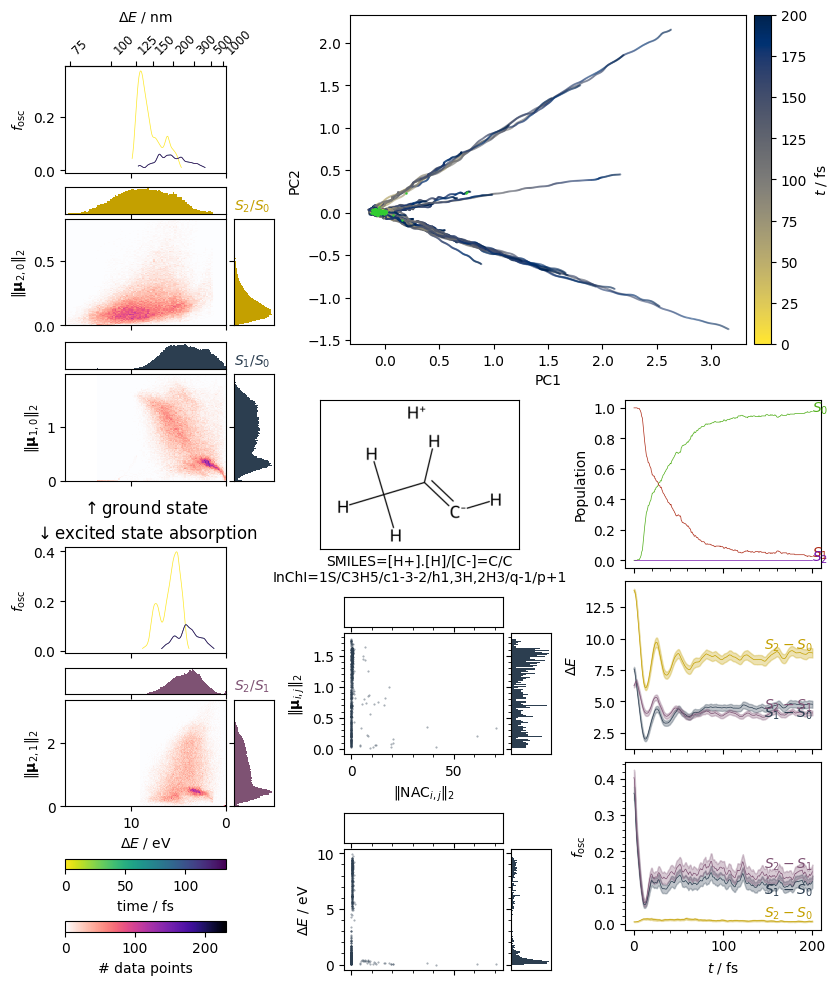

In [16]:
sheet = datasheet.Datasheet(frames=frames)
sheet.plot()

To reproduce figure ###:

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


(array([[-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        ...,
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442]]),
 array([[-1.76442702, -1.76442702, -1.76442702, ..., -1.76442702,
         -1.76442702, -1.76442702],
        [-1.73649151, -1.73649151, -1.73649151, ..., -1.73649151,
         -1.73649151, -1.73649151],
        [-1.70855601, -1.70855601, -1.70855601, ..., -1.70855601,
         -1.70855601, -1.70855601],
        ...,
        [ 0.94531678,  0.94531678,  0.94531678, ...,  

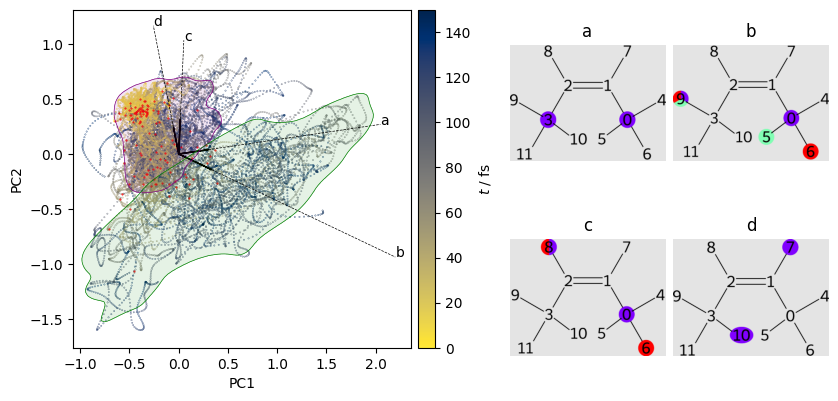

In [19]:
butene = xh.open_frames('dynamic/butene.nc')
dihedral_kde.biplot_dihedral_time(butene)